<a href="https://colab.research.google.com/github/barbinanm/UniCreditBank/blob/main/Task2_unicredit_changellenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.metrics import roc_auc_score

def gini_score(y_true, y_pred):
    return 2 * roc_auc_score(y_true, y_pred) - 1

def gini_scoring(estimator, X, y):
    return gini_score(y, estimator.predict_proba(X)[:,1])

# Data Load

### https://www.kaggle.com/competitions/tabular-playground-series-may-2022

In [ ]:
train = pd.read_csv('train.csv')
train.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [ ]:
train.shape

(900000, 33)

In [ ]:
train.columns

Index(['id', 'f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_07',
       'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16',
       'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25',
       'f_26', 'f_27', 'f_28', 'f_29', 'f_30', 'target'],
      dtype='object')

In [ ]:
train.isna().sum().sum()

0

In [ ]:
idx = train.pop('id')

target = train.pop('target')
target.mean()

0.4864877777777778

In [ ]:
train_desc = train.describe()
train_desc

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,...,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,-0.000286,0.001165,0.001174,-0.001368,-0.000571,0.000284,-0.000709,2.031460,2.057998,2.362431,...,-0.178730,-0.156307,-0.009273,-0.369459,-0.342738,0.176549,0.357591,-0.380876,0.345661,1.002654
std,0.998888,0.999193,1.000514,1.000175,1.000167,0.999875,0.999942,1.656172,1.590955,1.637706,...,2.400494,2.484706,2.450797,2.453405,2.386941,2.416959,2.476020,238.773054,0.475584,0.818989
min,-4.599856,-4.682199,-4.642676,-4.658816,-4.748501,-4.750214,-4.842919,0.000000,0.000000,0.000000,...,-11.257917,-13.310146,-11.853530,-12.301097,-11.416189,-11.918306,-14.300577,-1229.753052,0.000000,0.000000
25%,-0.675490,-0.675162,-0.674369,-0.676114,-0.675909,-0.673437,-0.674876,1.000000,1.000000,1.000000,...,-1.804612,-1.820063,-1.645585,-2.019739,-1.955956,-1.440424,-1.261598,-159.427418,0.000000,0.000000
50%,0.001144,0.002014,0.002218,-0.002227,-0.001662,-0.000438,-0.001492,2.000000,2.000000,2.000000,...,-0.190571,-0.152668,0.030850,-0.390966,-0.340746,0.160912,0.404212,-0.519808,0.000000,1.000000
75%,0.674337,0.675021,0.677505,0.672544,0.673789,0.675028,0.674749,3.000000,3.000000,3.000000,...,1.444508,1.507071,1.661676,1.255408,1.266673,1.795928,2.028219,158.987357,1.000000,2.000000
max,4.749301,4.815699,4.961982,4.454920,4.948983,4.971881,4.822668,15.000000,16.000000,14.000000,...,11.475325,14.455426,11.344080,12.247100,12.389844,12.529179,12.913041,1229.562577,1.000000,2.000000


In [ ]:
text_feat = train.pop('f_27')

In [ ]:
text_feat.nunique()

741354

In [ ]:
text_feat.value_counts()

BBBBBBCJBC    12
BCBBBBCLBC    12
BBBBBBDPCB    10
BBBBBBDKBC    10
ADBBBACQBC    10
              ..
BFAFAADTCE     1
BBBDAACOAE     1
BBABAACGBB     1
BFAABAGSDB     1
BCAACADSCE     1
Name: f_27, Length: 741354, dtype: int64

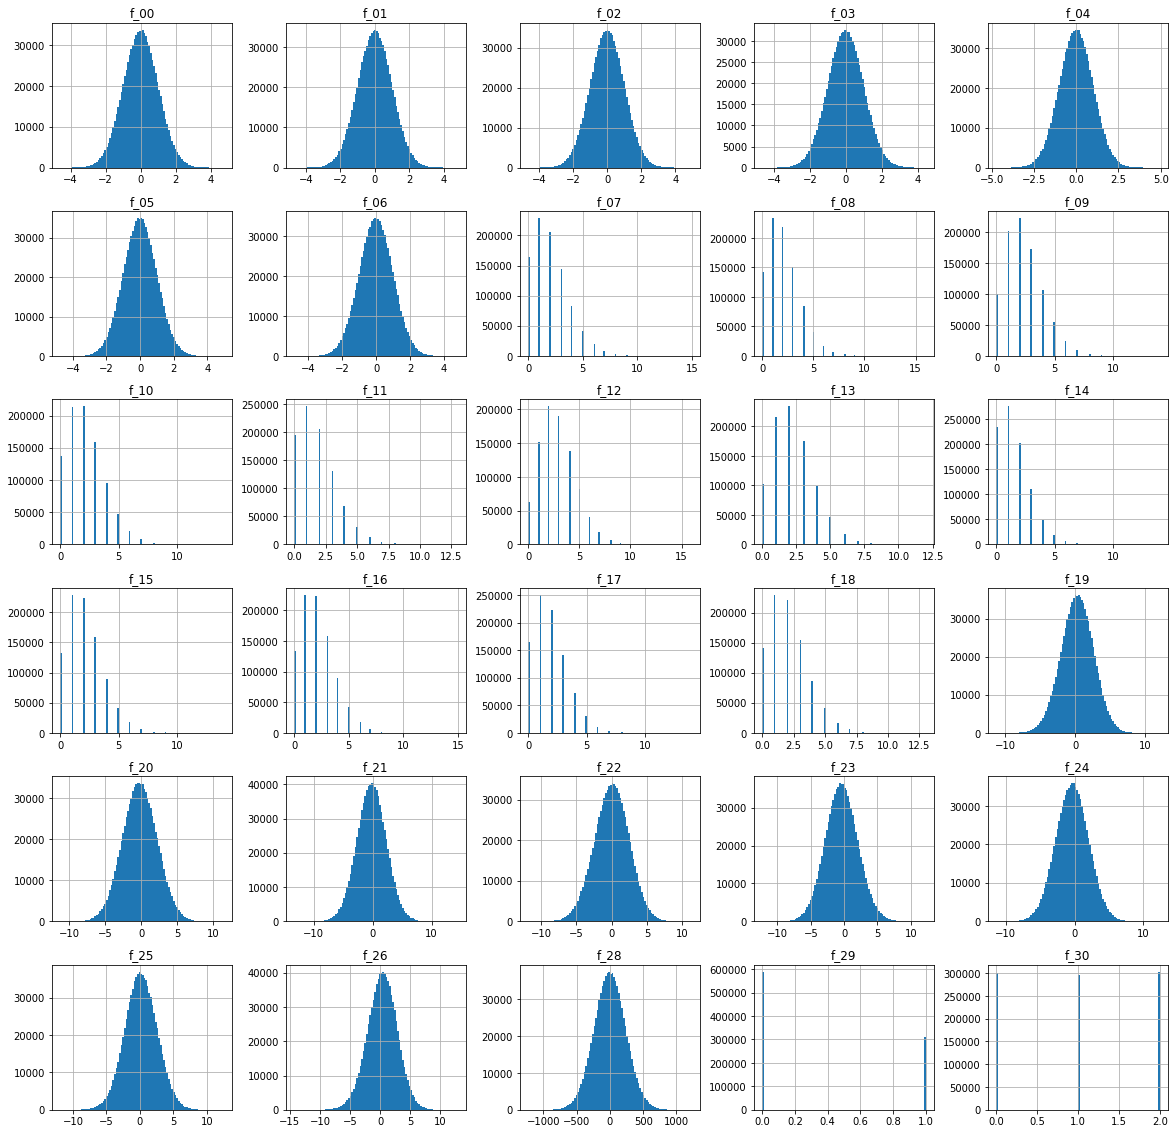

In [ ]:
train.hist(figsize=(20,20), bins=100)
plt.show()

# Elementary preprocessing by Weight of Evidence technique

### https://towardsdatascience.com/churn-analysis-information-value-and-weight-of-evidence-6a35db8b9ec5
### https://gnpalencia.org/optbinning/binning_binary.html

In [ ]:
from optbinning import OptimalBinning

optbin = OptimalBinning()
for i in train.columns[0:]:
    new_column_name = i + '_WoE'
    train[new_column_name] = optbin.fit_transform(train[i], target)
train.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_20_WoE,f_21_WoE,f_22_WoE,f_23_WoE,f_24_WoE,f_25_WoE,f_26_WoE,f_28_WoE,f_29_WoE,f_30_WoE
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,...,-0.062305,-0.244353,0.041040,-0.044964,0.230179,-0.100358,0.039296,0.102745,0.074717,0.039399
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,...,-0.092246,-0.126513,-0.037681,0.102869,0.082542,0.073265,0.039296,-0.480416,0.074717,0.039399
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,...,-0.084470,0.043655,0.017273,0.102869,-0.047777,0.094924,0.039296,0.091741,0.074717,-0.061744
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,...,-0.094615,0.078049,-0.032022,0.232954,-0.178592,-0.050866,0.039296,-0.038393,0.074717,0.039399
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,...,0.013765,-0.078289,0.058452,0.181204,-0.246168,0.073265,-0.831400,0.091741,0.074717,0.023236


In [ ]:
train_desc.loc['GINI'] = [gini_score(target, train[i]) for i in train.columns[0:30]]
train_desc.loc['GINI_WoE'] = [gini_score(target, train[i]) for i in train.columns[30:60]]
train_desc

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,...,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,-0.000286,0.001165,0.001174,-0.001368,-0.000571,0.000284,-0.000709,2.031460,2.057998,2.362431,...,-0.178730,-0.156307,-0.009273,-0.369459,-0.342738,0.176549,0.357591,-0.380876,0.345661,1.002654
std,0.998888,0.999193,1.000514,1.000175,1.000167,0.999875,0.999942,1.656172,1.590955,1.637706,...,2.400494,2.484706,2.450797,2.453405,2.386941,2.416959,2.476020,238.773054,0.475584,0.818989
min,-4.599856,-4.682199,-4.642676,-4.658816,-4.748501,-4.750214,-4.842919,0.000000,0.000000,0.000000,...,-11.257917,-13.310146,-11.853530,-12.301097,-11.416189,-11.918306,-14.300577,-1229.753052,0.000000,0.000000
25%,-0.675490,-0.675162,-0.674369,-0.676114,-0.675909,-0.673437,-0.674876,1.000000,1.000000,1.000000,...,-1.804612,-1.820063,-1.645585,-2.019739,-1.955956,-1.440424,-1.261598,-159.427418,0.000000,0.000000
50%,0.001144,0.002014,0.002218,-0.002227,-0.001662,-0.000438,-0.001492,2.000000,2.000000,2.000000,...,-0.190571,-0.152668,0.030850,-0.390966,-0.340746,0.160912,0.404212,-0.519808,0.000000,1.000000
75%,0.674337,0.675021,0.677505,0.672544,0.673789,0.675028,0.674749,3.000000,3.000000,3.000000,...,1.444508,1.507071,1.661676,1.255408,1.266673,1.795928,2.028219,158.987357,1.000000,2.000000
max,4.749301,4.815699,4.961982,4.454920,4.948983,4.971881,4.822668,15.000000,16.000000,14.000000,...,11.475325,14.455426,11.344080,12.247100,12.389844,12.529179,12.913041,1229.562577,1.000000,2.000000
GINI,0.061267,0.060934,0.034563,-0.000044,0.000068,0.035976,-0.000892,0.010979,0.057267,0.072843,...,-0.043724,0.128521,0.060849,0.097623,0.103323,-0.035372,0.042407,0.040419,0.048818,0.022576
GINI_WoE,-0.061232,-0.060959,-0.034851,-0.001428,-0.003272,-0.036130,-0.002202,-0.017163,-0.070877,-0.072333,...,-0.050502,-0.127494,-0.060422,-0.115567,-0.103579,-0.055337,-0.071637,-0.092741,-0.048818,-0.022576


In [ ]:
train_desc_T = train_desc.T.sort_values(by='GINI_WoE')
train_desc_T

,count,mean,std,min,25%,50%,75%,max,GINI,GINI_WoE
f_21,900000.0,-0.156307,2.484706,-13.310146,-1.820063,-0.152668,1.507071,14.455426,0.128521,-0.127494
f_23,900000.0,-0.369459,2.453405,-12.301097,-2.019739,-0.390966,1.255408,12.247100,0.097623,-0.115567
f_24,900000.0,-0.342738,2.386941,-11.416189,-1.955956,-0.340746,1.266673,12.389844,0.103323,-0.103579
f_19,900000.0,0.308713,2.316026,-11.280941,-1.236061,0.330249,1.880517,12.079667,-0.097240,-0.096972
f_28,900000.0,-0.380876,238.773054,-1229.753052,-159.427418,-0.519808,158.987357,1229.562577,0.040419,-0.092741
f_11,900000.0,1.803392,1.537487,0.000000,1.000000,2.000000,3.000000,13.000000,-0.084520,-0.084470
f_09,900000.0,2.362431,1.637706,0.000000,1.000000,2.000000,3.000000,14.000000,0.072843,-0.072333
f_26,900000.0,0.357591,2.476020,-14.300577,-1.261598,0.404212,2.028219,12.913041,0.042407,-0.071637
f_08,900000.0,2.057998,1.590955,0.000000,1.000000,2.000000,3.000000,16.000000,0.057267,-0.070877
f_00,900000.0,-0.000286,0.998888,-4.599856,-0.675490,0.001144,0.674337,4.749301,0.061267,-0.061232


In [ ]:
train_desc_T.iloc[:5].index

Index(['f_21', 'f_23', 'f_24', 'f_19', 'f_28'], dtype='object')

# Logistic Regression Evaluation

### C = 10e10 turn off the regularization
### Scoring is a method for model evaluation

In [ ]:
top_05_feats = [i+'_WoE' for i in train_desc_T.iloc[:5].index]
cross_val_score(LogisticRegression(C=10e10, random_state=42), train[top_05_feats], target, scoring=gini_scoring).mean()

0.25319975105961257

In [ ]:
top_10_feats = [i+'_WoE' for i in train_desc_T.iloc[:10].index]
cross_val_score(LogisticRegression(C=10e10, random_state=42), train[top_10_feats], target, scoring=gini_scoring).mean()

0.314930778622449

In [ ]:
top_15_feats = [i+'_WoE' for i in train_desc_T.iloc[:15].index]
cross_val_score(LogisticRegression(C=10e10, random_state=42), train[top_15_feats], target, scoring=gini_scoring).mean()

0.35523244214529165

In [ ]:
top_20_feats = [i+'_WoE' for i in train_desc_T.iloc[:20].index]
cross_val_score(LogisticRegression(C=10e10, random_state=42), train[top_20_feats], target, scoring=gini_scoring).mean()

0.37216698926162206

In [ ]:
top_25_feats = [i+'_WoE' for i in train_desc_T.iloc[:25].index]
cross_val_score(LogisticRegression(C=10e10, random_state=42), train[top_25_feats], target, scoring=gini_scoring).mean()

0.3791581950879825

In [ ]:
top_30_feats = [i+'_WoE' for i in train_desc_T.iloc[:30].index]
cross_val_score(LogisticRegression(C=10e10, random_state=42), train[top_30_feats], target, scoring=gini_scoring).mean()

0.37996053559424625

# Greedy Selection

In [ ]:
from greedy_selection import *

feats = train.columns[30:60]

model = GreedySelector(X=train[feats], y=target, model=LogisticRegression(C=10e10, random_state=42),
                       n_folds=5, random_state=42, predict='predict_proba', improvement=0.001,
                       metric=gini_score, higher_is_better=True)

Всего признаков - 30


  0%|          | 0/30 [00:00<?, ?it/s]

Уже отобрано признаков - 0 



  0%|          | 0/30 [00:00<?, ?it/s]

 Отобранные признаки: ['f_21_WoE'] 
 Метрика качества на обучающей выборке: 0.12749356166302395 
Уже отобрано признаков - 1 



  0%|          | 0/29 [00:00<?, ?it/s]

 Отобранные признаки: ['f_21_WoE', 'f_23_WoE'] 
 Метрика качества на обучающей выборке: 0.18944828454239304 
Уже отобрано признаков - 2 



  0%|          | 0/28 [00:00<?, ?it/s]

 Отобранные признаки: ['f_21_WoE', 'f_23_WoE', 'f_22_WoE'] 
 Метрика качества на обучающей выборке: 0.22981997209638294 
Уже отобрано признаков - 3 



  0%|          | 0/27 [00:00<?, ?it/s]

 Отобранные признаки: ['f_21_WoE', 'f_23_WoE', 'f_22_WoE', 'f_26_WoE'] 
 Метрика качества на обучающей выборке: 0.25674744141149297 
Уже отобрано признаков - 4 



  0%|          | 0/26 [00:00<?, ?it/s]

 Отобранные признаки: ['f_21_WoE', 'f_23_WoE', 'f_22_WoE', 'f_26_WoE', 'f_28_WoE'] 
 Метрика качества на обучающей выборке: 0.2764221804762135 
Уже отобрано признаков - 5 



  0%|          | 0/25 [00:00<?, ?it/s]

 Отобранные признаки: ['f_21_WoE', 'f_23_WoE', 'f_22_WoE', 'f_26_WoE', 'f_28_WoE', 'f_19_WoE'] 
 Метрика качества на обучающей выборке: 0.29114103721972495 
Уже отобрано признаков - 6 



  0%|          | 0/24 [00:00<?, ?it/s]

 Отобранные признаки: ['f_21_WoE', 'f_23_WoE', 'f_22_WoE', 'f_26_WoE', 'f_28_WoE', 'f_19_WoE', 'f_11_WoE'] 
 Метрика качества на обучающей выборке: 0.3045386680719142 
Уже отобрано признаков - 7 



  0%|          | 0/23 [00:00<?, ?it/s]

 Отобранные признаки: ['f_21_WoE', 'f_23_WoE', 'f_22_WoE', 'f_26_WoE', 'f_28_WoE', 'f_19_WoE', 'f_11_WoE', 'f_24_WoE'] 
 Метрика качества на обучающей выборке: 0.3134801677987693 
Уже отобрано признаков - 8 



  0%|          | 0/22 [00:00<?, ?it/s]

 Отобранные признаки: ['f_21_WoE', 'f_23_WoE', 'f_22_WoE', 'f_26_WoE', 'f_28_WoE', 'f_19_WoE', 'f_11_WoE', 'f_24_WoE', 'f_08_WoE'] 
 Метрика качества на обучающей выборке: 0.32240332846309383 
Уже отобрано признаков - 9 



  0%|          | 0/21 [00:00<?, ?it/s]

 Отобранные признаки: ['f_21_WoE', 'f_23_WoE', 'f_22_WoE', 'f_26_WoE', 'f_28_WoE', 'f_19_WoE', 'f_11_WoE', 'f_24_WoE', 'f_08_WoE', 'f_09_WoE'] 
 Метрика качества на обучающей выборке: 0.33158596715302213 
Уже отобрано признаков - 10 



  0%|          | 0/20 [00:00<?, ?it/s]

 Отобранные признаки: ['f_21_WoE', 'f_23_WoE', 'f_22_WoE', 'f_26_WoE', 'f_28_WoE', 'f_19_WoE', 'f_11_WoE', 'f_24_WoE', 'f_08_WoE', 'f_09_WoE', 'f_15_WoE'] 
 Метрика качества на обучающей выборке: 0.33883720908683324 
Уже отобрано признаков - 11 



  0%|          | 0/19 [00:00<?, ?it/s]

 Отобранные признаки: ['f_21_WoE', 'f_23_WoE', 'f_22_WoE', 'f_26_WoE', 'f_28_WoE', 'f_19_WoE', 'f_11_WoE', 'f_24_WoE', 'f_08_WoE', 'f_09_WoE', 'f_15_WoE', 'f_29_WoE'] 
 Метрика качества на обучающей выборке: 0.3455516413132602 
Уже отобрано признаков - 12 



  0%|          | 0/18 [00:00<?, ?it/s]

 Отобранные признаки: ['f_21_WoE', 'f_23_WoE', 'f_22_WoE', 'f_26_WoE', 'f_28_WoE', 'f_19_WoE', 'f_11_WoE', 'f_24_WoE', 'f_08_WoE', 'f_09_WoE', 'f_15_WoE', 'f_29_WoE', 'f_16_WoE'] 
 Метрика качества на обучающей выборке: 0.35047364261391967 
Уже отобрано признаков - 13 



  0%|          | 0/17 [00:00<?, ?it/s]

 Отобранные признаки: ['f_21_WoE', 'f_23_WoE', 'f_22_WoE', 'f_26_WoE', 'f_28_WoE', 'f_19_WoE', 'f_11_WoE', 'f_24_WoE', 'f_08_WoE', 'f_09_WoE', 'f_15_WoE', 'f_29_WoE', 'f_16_WoE', 'f_20_WoE'] 
 Метрика качества на обучающей выборке: 0.35492891693079276 
Уже отобрано признаков - 14 



  0%|          | 0/16 [00:00<?, ?it/s]

 Отобранные признаки: ['f_21_WoE', 'f_23_WoE', 'f_22_WoE', 'f_26_WoE', 'f_28_WoE', 'f_19_WoE', 'f_11_WoE', 'f_24_WoE', 'f_08_WoE', 'f_09_WoE', 'f_15_WoE', 'f_29_WoE', 'f_16_WoE', 'f_20_WoE', 'f_25_WoE'] 
 Метрика качества на обучающей выборке: 0.3593171070942325 
Уже отобрано признаков - 15 



  0%|          | 0/15 [00:00<?, ?it/s]

 Отобранные признаки: ['f_21_WoE', 'f_23_WoE', 'f_22_WoE', 'f_26_WoE', 'f_28_WoE', 'f_19_WoE', 'f_11_WoE', 'f_24_WoE', 'f_08_WoE', 'f_09_WoE', 'f_15_WoE', 'f_29_WoE', 'f_16_WoE', 'f_20_WoE', 'f_25_WoE', 'f_30_WoE'] 
 Метрика качества на обучающей выборке: 0.3631740396594296 
Уже отобрано признаков - 16 



  0%|          | 0/14 [00:00<?, ?it/s]

 Отобранные признаки: ['f_21_WoE', 'f_23_WoE', 'f_22_WoE', 'f_26_WoE', 'f_28_WoE', 'f_19_WoE', 'f_11_WoE', 'f_24_WoE', 'f_08_WoE', 'f_09_WoE', 'f_15_WoE', 'f_29_WoE', 'f_16_WoE', 'f_20_WoE', 'f_25_WoE', 'f_30_WoE', 'f_01_WoE'] 
 Метрика качества на обучающей выборке: 0.36672005704328514 
Уже отобрано признаков - 17 



  0%|          | 0/13 [00:00<?, ?it/s]

 Отобранные признаки: ['f_21_WoE', 'f_23_WoE', 'f_22_WoE', 'f_26_WoE', 'f_28_WoE', 'f_19_WoE', 'f_11_WoE', 'f_24_WoE', 'f_08_WoE', 'f_09_WoE', 'f_15_WoE', 'f_29_WoE', 'f_16_WoE', 'f_20_WoE', 'f_25_WoE', 'f_30_WoE', 'f_01_WoE', 'f_00_WoE'] 
 Метрика качества на обучающей выборке: 0.3701954677900543 
Уже отобрано признаков - 18 



  0%|          | 0/12 [00:00<?, ?it/s]

 Отобранные признаки: ['f_21_WoE', 'f_23_WoE', 'f_22_WoE', 'f_26_WoE', 'f_28_WoE', 'f_19_WoE', 'f_11_WoE', 'f_24_WoE', 'f_08_WoE', 'f_09_WoE', 'f_15_WoE', 'f_29_WoE', 'f_16_WoE', 'f_20_WoE', 'f_25_WoE', 'f_30_WoE', 'f_01_WoE', 'f_00_WoE', 'f_10_WoE'] 
 Метрика качества на обучающей выборке: 0.37286341100937226 
Уже отобрано признаков - 19 



  0%|          | 0/11 [00:00<?, ?it/s]

 Отобранные признаки: ['f_21_WoE', 'f_23_WoE', 'f_22_WoE', 'f_26_WoE', 'f_28_WoE', 'f_19_WoE', 'f_11_WoE', 'f_24_WoE', 'f_08_WoE', 'f_09_WoE', 'f_15_WoE', 'f_29_WoE', 'f_16_WoE', 'f_20_WoE', 'f_25_WoE', 'f_30_WoE', 'f_01_WoE', 'f_00_WoE', 'f_10_WoE', 'f_13_WoE'] 
 Метрика качества на обучающей выборке: 0.3749678194874153 
Уже отобрано признаков - 20 



  0%|          | 0/10 [00:00<?, ?it/s]

 Отобранные признаки: ['f_21_WoE', 'f_23_WoE', 'f_22_WoE', 'f_26_WoE', 'f_28_WoE', 'f_19_WoE', 'f_11_WoE', 'f_24_WoE', 'f_08_WoE', 'f_09_WoE', 'f_15_WoE', 'f_29_WoE', 'f_16_WoE', 'f_20_WoE', 'f_25_WoE', 'f_30_WoE', 'f_01_WoE', 'f_00_WoE', 'f_10_WoE', 'f_13_WoE', 'f_12_WoE'] 
 Метрика качества на обучающей выборке: 0.37626978856447146 
Уже отобрано признаков - 21 



  0%|          | 0/9 [00:00<?, ?it/s]

 Отобранные признаки: ['f_21_WoE', 'f_23_WoE', 'f_22_WoE', 'f_26_WoE', 'f_28_WoE', 'f_19_WoE', 'f_11_WoE', 'f_24_WoE', 'f_08_WoE', 'f_09_WoE', 'f_15_WoE', 'f_29_WoE', 'f_16_WoE', 'f_20_WoE', 'f_25_WoE', 'f_30_WoE', 'f_01_WoE', 'f_00_WoE', 'f_10_WoE', 'f_13_WoE', 'f_12_WoE', 'f_05_WoE'] 
 Метрика качества на обучающей выборке: 0.37732765511163247 
Уже отобрано признаков - 22 



  0%|          | 0/8 [00:00<?, ?it/s]

 Отобранные признаки: ['f_21_WoE', 'f_23_WoE', 'f_22_WoE', 'f_26_WoE', 'f_28_WoE', 'f_19_WoE', 'f_11_WoE', 'f_24_WoE', 'f_08_WoE', 'f_09_WoE', 'f_15_WoE', 'f_29_WoE', 'f_16_WoE', 'f_20_WoE', 'f_25_WoE', 'f_30_WoE', 'f_01_WoE', 'f_00_WoE', 'f_10_WoE', 'f_13_WoE', 'f_12_WoE', 'f_05_WoE', 'f_02_WoE'] 
 Метрика качества на обучающей выборке: 0.37835955558412326 
Уже отобрано признаков - 23 



  0%|          | 0/7 [00:00<?, ?it/s]

Метрика качества больше не улучшается. Все посчиталось. Поздравляю!
